In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#training data
dfx=pd.read_csv('Linear_X_Train.csv')
dfy=pd.read_csv('Linear_Y_Train.csv')

In [3]:
dfx.shape,dfy.shape

((3750, 1), (3750, 1))

In [4]:
dfx=dfx.values
dfy=dfy.values

x=dfx.reshape(-1)
y=dfy.reshape(-1)

x.shape,y.shape

((3750,), (3750,))

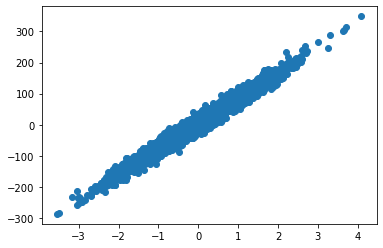

In [5]:
#visualize training data
plt.scatter(x,y)
plt.show()

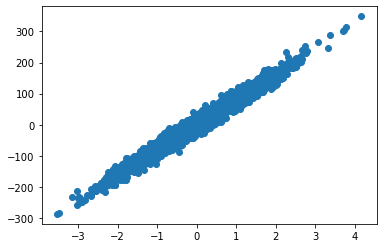

In [6]:
#normalisation of x
x=(x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()

In [7]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x   #  c + m*x = h(x)

def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        err+=(hx-y[i])**2
    return err



#Gradient Function

def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=((hx-y[i])*x[i])
    return grad



In [8]:
#Gradient Descent Funtion
def gradientDescent(x,y,learning_rate=0.00005):
    
    theta=np.array([-2.0,0.0])
    errList=[]
    thetaList=[]
    
    itr=0
    
    while(itr<=1000):
        
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        errList.append(err)
        
        theta[0] =theta[0]-(learning_rate*grad[0])
        theta[1] =theta[1]-(learning_rate*grad[1])
        
        thetaList.append(theta)
        itr=itr+1
    return theta,errList,thetaList    

In [9]:
#calling Gradient Descent Function
finalTheta, errList, thetaList=gradientDescent(x,y)

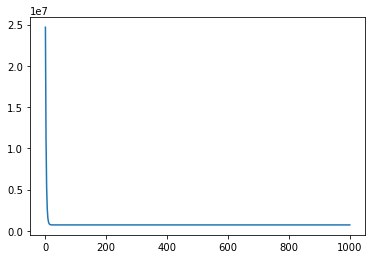

In [10]:
#visualize error minimization
plt.plot(errList)
plt.show()

In [11]:
print(finalTheta)

[ 0.68386897 79.90573694]


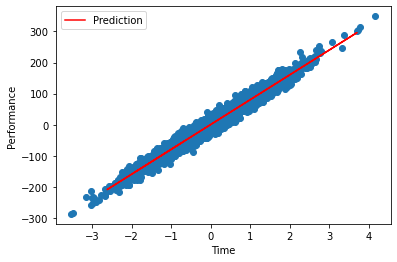

In [14]:
xtest=pd.read_csv('Linear_X_Test.csv')
xtest=xtest.values.reshape(-1)

plt.plot(xtest,hypothesis(xtest,finalTheta),color='red',label='Prediction')
plt.scatter(x,y)
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()